<a href="https://colab.research.google.com/github/Nik852001/Regression_Capstone_Project/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike Sharing Demand Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member  -** Nikhil Rajendra Mandavkar

# **Project Summary -**

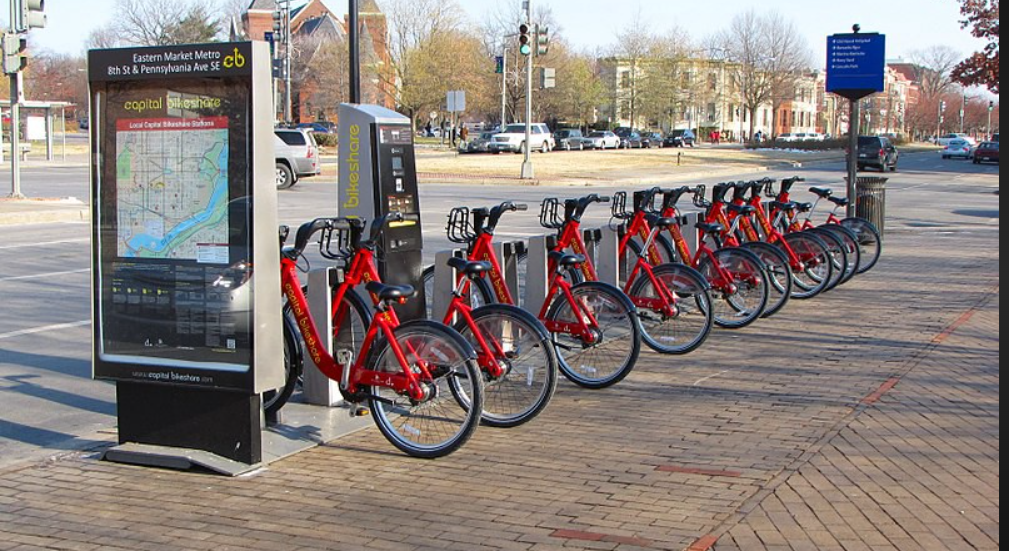

The "Bike Sharing Demand Prediction" project aims to develop a predictive model that can accurately forecast the demand for bike sharing services in a given location and time frame. Bike sharing systems have become increasingly popular in urban areas, offering an eco-friendly and convenient mode of transportation. Accurate demand prediction is crucial for optimizing bike allocation, ensuring user satisfaction, and managing operational costs effectively.

**Key Objectives:**

**Data Collection and Preprocessing:**
Gather historical data on bike rentals, including variables such as date, time, weather conditions, and user information.
Clean, preprocess, and transform the data to make it suitable for modeling.

**Exploratory Data Analysis (EDA):**
Conduct EDA to gain insights into the dataset, identifying trends, patterns, and correlations.
Visualize the data to better understand the factors influencing bike rental demand.

**Feature Engineering:**
Create relevant features, such as time of day, day of the week, and weather indicators, to improve the model's accuracy.
Handle categorical variables through encoding techniques.

**Model Development:**
Implement various machine learning algorithms, such as linear regression, decision trees, random forests, and gradient boosting, to build predictive models.
Evaluate and compare the performance of these models using appropriate metrics, like Mean Absolute Error (MAE) or Root Mean Square Error (RMSE).

**Model Validation and Testing:**
Split the dataset into training and testing sets to assess the model's generalization performance.
Validate the model's predictions against real-world demand data.

# **Data Description :**

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **GitHub Link -**

https://github.com/Nik852001/Regression_Capstone_Project

# **Problem Statement**


Many metropolitan areas now offer bike rentals to improve mobility and convenience. Ensuring timely access to rental bikes is critical to reducing wait times for the public, making a consistent supply of rental bikes a major concern. The expected hourly bicycle count is particularly crucial in this regard.

Bike sharing systems automate membership, rentals, and bike returns through a network of locations. Individuals can rent bikes from one location and return them to another or the same location, as needed. Membership or request facilitates bike rentals, and the process is overseen by a citywide network of automated stores.

This dataset aims to predict the demand for Seoul's Bike Sharing Program based on historical usage patterns, including temperature, time, and other data.

### **Business Context**

Estimating the number of required bikes at any given time and day is a critical business concern. Having fewer bikes results in resource wastage (in terms of bike maintenance and the land/bike stand required for parking and security), while having more bikes can lead to revenue loss, ranging from immediate loss due to a lower number of customers to potential long-term loss due to a loss of future customers. Therefore, it is essential for bike rental businesses to have an estimate of demand to function effectively.

### **1.Import Libraries and Loading Dataset**

In [562]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [563]:
# connecting google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [564]:
# Load Dataset
bike_sharing_df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding='unicode_escape')

### **2.EDA**

In [565]:
# Dataset First Look
bike_sharing_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [566]:
#Last 5 observations
bike_sharing_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [567]:
# Dataset Rows & Columns count
bike_sharing_df.shape

(8760, 14)

Observation:
*   We have 8,760 observations and 14 columns in our dataset.







In [568]:
#List of columns of the dataframe
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [569]:
#Statistical description of the dataframe
bike_sharing_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [570]:
#A concise summary of the dataframe
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [571]:
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df[col].unique())

In [572]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Seasons','Holiday']
cat_unique_vals(categorical_columns,bike_sharing_df)

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']


We'll perform further checks for the values that categorical columns can take.

In [573]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_df_analysis(col):
  return bike_sharing_df.groupby(col)['Rented Bike Count'].sum().reset_index()

In [574]:
#Seasons column
seasons_col = create_df_analysis('Seasons')
seasons_col

Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

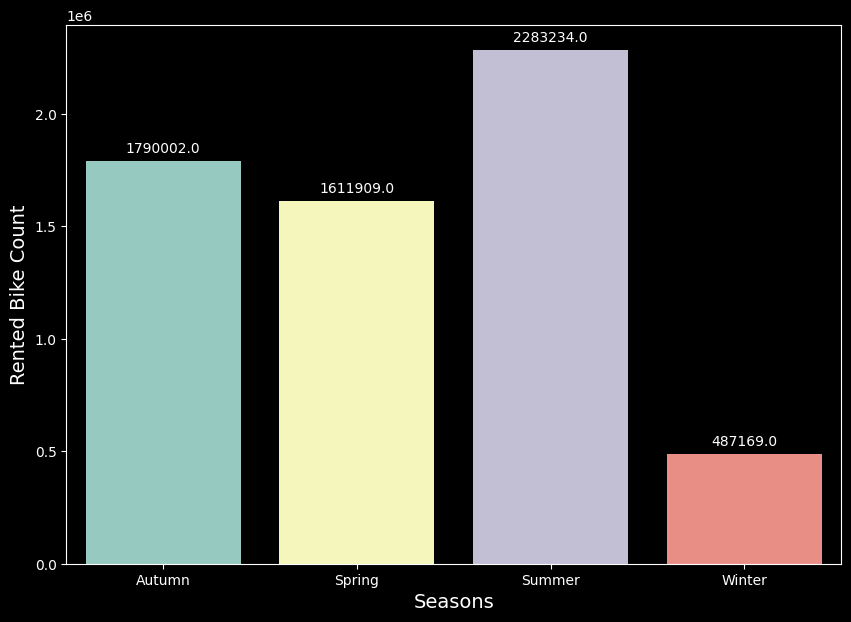

In [575]:
#Creating a visualisation for the seasons column
plt.figure(figsize=(10,7))
splot = sns.barplot(data=seasons_col,x='Seasons',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

In [576]:
#Initial preparations for plotting pie chart with percentages
seasons_list = list(seasons_col['Seasons'])
rented_count_list = list(seasons_col['Rented Bike Count'])
palette_color = sns.color_palette('bright')
explode = (0.05,0.05,0.05,0.05)

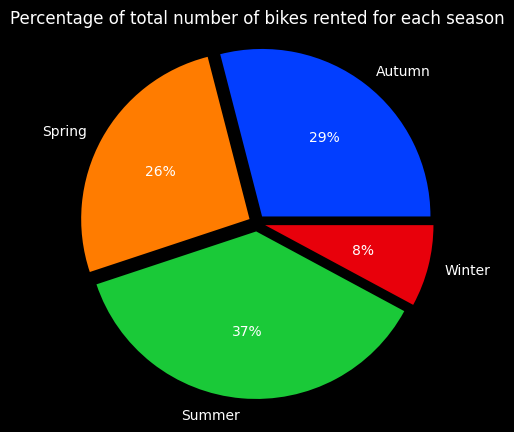

In [577]:
#Creating the pie chart visualisation for seasons column
plt.figure(figsize=(5,5))
plt.pie(rented_count_list,labels=seasons_list,colors=palette_color,explode=explode,autopct='%0.0f%%')
plt.title("Percentage of total number of bikes rented for each season")
plt.axis("equal")
plt.show()

Observation:
* As we can see that summer has the highest number of bikes rented, 37%. This could be because of the vacation mood created in summer and also the increase in the number of tourists. Winter however is the season where the least number of bikes are rented, 8%.

### **2.1 Column: 'rented_bike_count'**

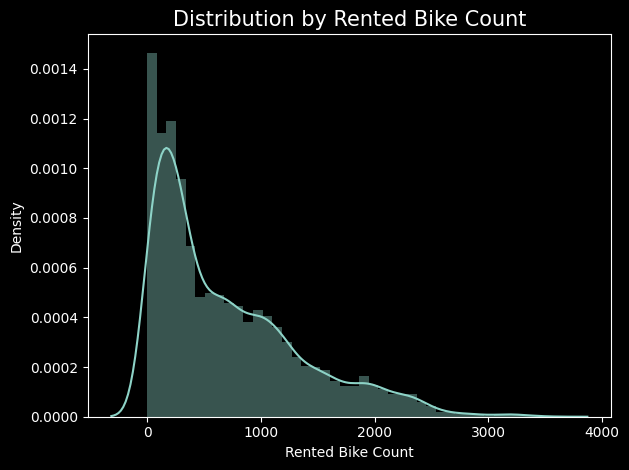

In [578]:
#fig,ax = plt.subplots(1, figsize=(15,4))

# Distribution analysis
dist = sns.distplot(bike_sharing_df['Rented Bike Count'])
dist.set_title('Distribution by Rented Bike Count', size=15)

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of Rented Bike Count is positively skewed and has many outliers. We will treat it later.



### **2.2 Column: 'Temperature'**

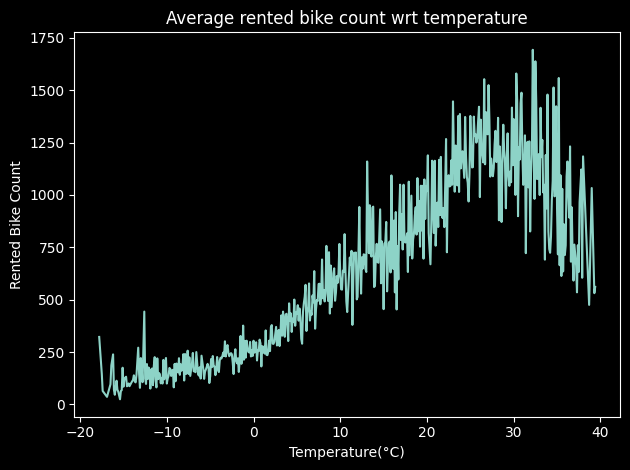

In [579]:
#fig,ax = plt.subplots(1,1, figsize=(18,4))

# Univariate analysis
temp_wrt_bike_rent_count = bike_sharing_df.groupby(['Temperature(°C)'])['Rented Bike Count'].mean().reset_index()

line = sns.lineplot(x = 'Temperature(°C)', y ='Rented Bike Count', data = temp_wrt_bike_rent_count)
line.set_title('Average rented bike count wrt temperature')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature.
* People prefer renting bikes in warm environments. Therefore, the demand for bicycles is high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.

### **2.3 Column: 'hour'**

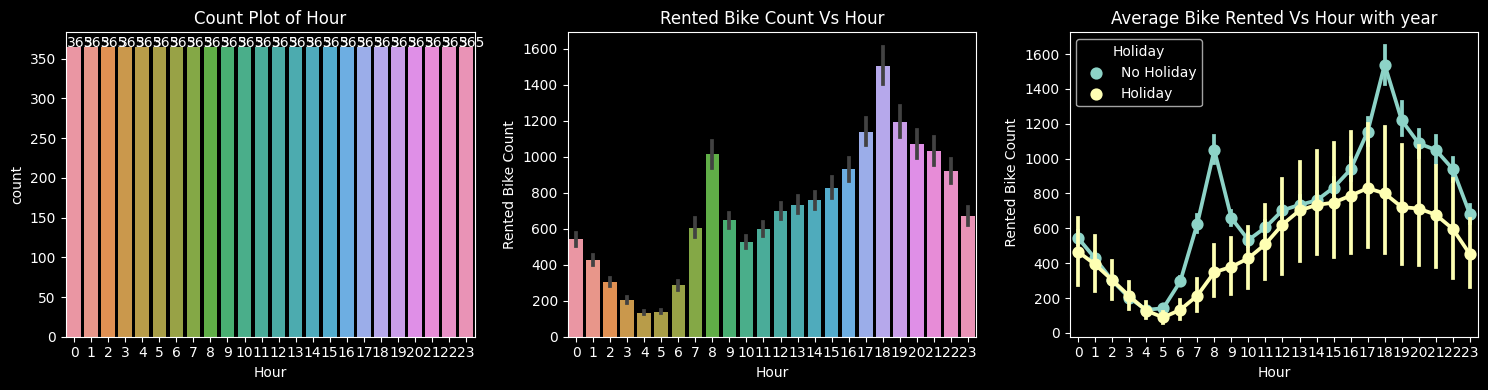

In [580]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_sharing_df, x='Hour', ax=ax[0])
count.set_title('Count Plot of Hour')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis
# Rented Bike Count Vs Hour
bar = sns.barplot(data=bike_sharing_df, x='Hour', y='Rented Bike Count', ax = ax[1])
bar.set(xlabel='Hour', ylabel='Rented Bike Count', title='Rented Bike Count Vs Hour')

# Multi-variate analysis
point = sns.pointplot(data=bike_sharing_df, x='Hour', y='Rented Bike Count', hue='Holiday', ax= ax[2])
point.set(xlabel='Hour', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Hour with year')

plt.tight_layout()
plt.show()

**Observation:**
* Every hour has an equal number of counts in the dataset.
* Demand for rented bike count is higher at 8 AM and 6 PM indicating a high demand during business hours.
* Rented Bike Count follows 2 patterns one for holiday and another for no holiday.
* Holiday: The first pattern is where there is a peak in the rentals at around 8 am and another at around 6 pm. These correspond to local bikers who typically go to work on a working day, Monday to Friday.
* Non-Working Day: Second pattern where there are more or less uniform rentals across the day with a peak at around noon time. These correspond to probable tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on nonworking days which typically are Saturday and Sunday

### **2.4 Column: 'Humidity(%)'**

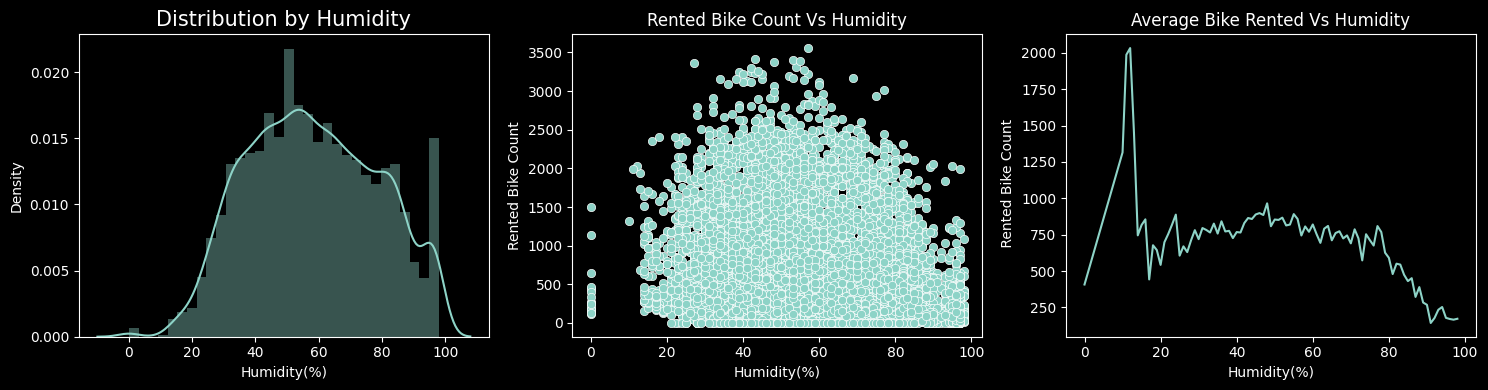

In [581]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_sharing_df['Humidity(%)'], ax=ax[0])
dist.set_title('Distribution by Humidity', size=15)

# Bi-variate analysis
# Rented Bike Count Vs Humidity
scatter = sns.scatterplot(data=bike_sharing_df, x='Humidity(%)', y='Rented Bike Count', ax = ax[1])
scatter.set(xlabel='Humidity(%)', ylabel='Rented Bike Count', title='Rented Bike Count Vs Humidity')

# Line Plot
group_wind_speed = bike_sharing_df.groupby(['Humidity(%)'])['Rented Bike Count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='Humidity(%)', y = 'Rented Bike Count', ax= ax[2])
line.set(xlabel='Humidity(%)', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Humidity')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the plots above that the average number of bikes rented goes up and down sharply with the peak at around 50. For the number of rented bikes in demand, the most preferred humid environment is 20-90.

### **2.5 Column: 'Wind speed (m/s)'**

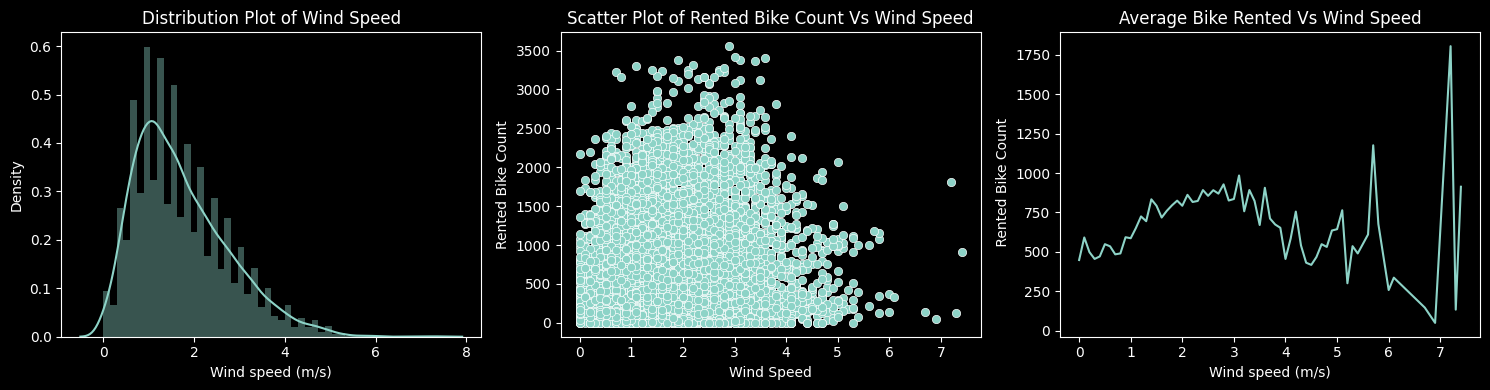

In [582]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_sharing_df['Wind speed (m/s)'], ax=ax[0])
dist.set_title('Distribution Plot of Wind Speed')

# Bi-variate analysis
# Rented Bike Count Vs Wind Speed
scatter = sns.scatterplot(data=bike_sharing_df, x='Wind speed (m/s)', y='Rented Bike Count', ax = ax[1])
scatter.set(xlabel='Wind Speed', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Wind Speed')

# Line Plot
group_wind_speed = bike_sharing_df.groupby(['Wind speed (m/s)'])['Rented Bike Count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='Wind speed (m/s)', y = 'Rented Bike Count', ax= ax[2])
line.set(xlabel='Wind speed (m/s)', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Wind Speed')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the distribution plot that wind speed is slightly positively skewed.
* Scatter Plot tells us about the distribution of the wind speed and rented bike count, and how the values of the two variables are related to each other.
* Line plot tells us that people prefer moderate wind but there is a spike at wind speed 7.

### **2.6 Column: 'Visibility (10m)'**

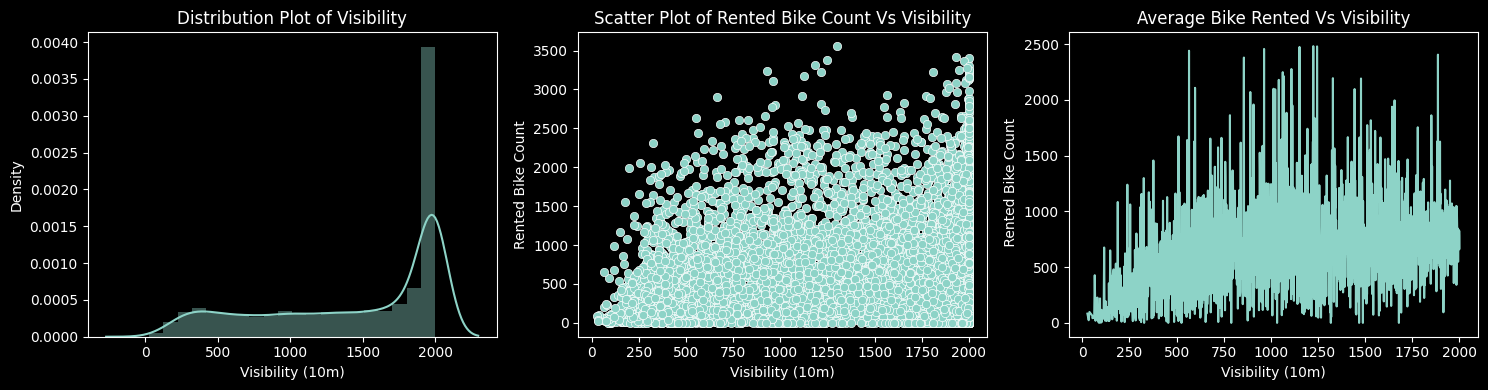

In [583]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_sharing_df['Visibility (10m)'], ax=ax[0])
dist.set_title('Distribution Plot of Visibility')

# Bi-variate analysis
# Rented Bike Count Vs Visibility
scatter = sns.scatterplot(data=bike_sharing_df, x='Visibility (10m)', y='Rented Bike Count', ax = ax[1])
scatter.set(xlabel='Visibility (10m)', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Visibility')

# Line Plot
group_visibility = bike_sharing_df.groupby(['Visibility (10m)'])['Rented Bike Count'].mean().reset_index()
line = sns.lineplot(data=group_visibility, x='Visibility (10m)', y = 'Rented Bike Count', ax= ax[2])
line.set(xlabel='Visibility (10m)', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Visibility')

plt.tight_layout()
plt.show()

**Observation:**
* Visibility is highly skewed to the left side.
* We can see from these plots above that as visibility rises, so does rented_bike_count.

### **2.7 Column: 'Dew point temperature(°C)'**

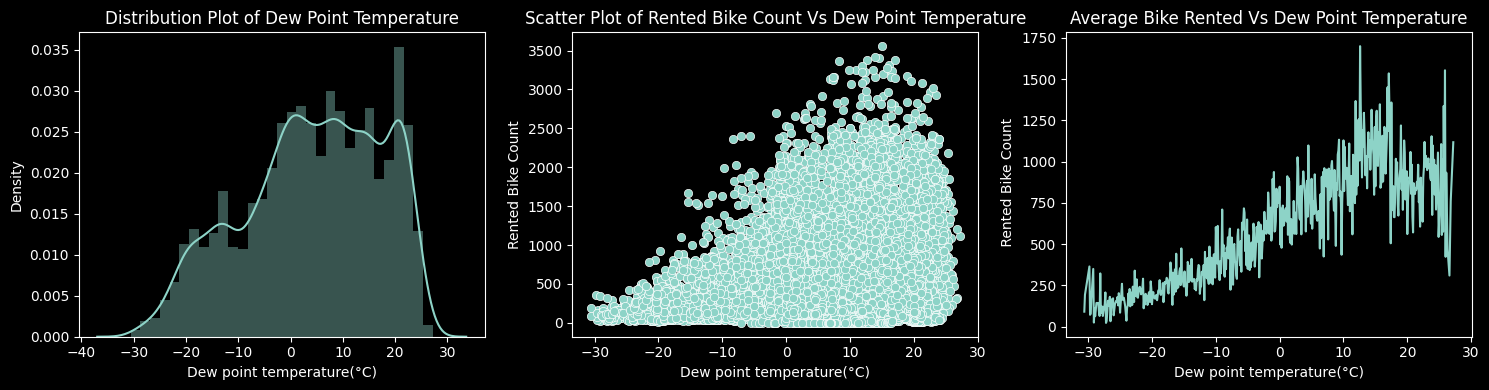

In [584]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_sharing_df['Dew point temperature(°C)'], ax=ax[0])
dist.set_title('Distribution Plot of Dew Point Temperature')

# Bi-variate analysis
# Rented Bike Count Vs Dew Point Temperature
scatter = sns.scatterplot(data=bike_sharing_df, x='Dew point temperature(°C)', y='Rented Bike Count', ax = ax[1])
scatter.set(xlabel='Dew point temperature(°C)', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Dew Point Temperature')

# Line Plot
group_dew_point_temperature = bike_sharing_df.groupby(['Dew point temperature(°C)'])['Rented Bike Count'].mean().reset_index()
line = sns.lineplot(data = group_dew_point_temperature, x ='Dew point temperature(°C)', y = 'Rented Bike Count', ax= ax[2])
line.set(xlabel='Dew point temperature(°C)', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Dew Point Temperature')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the above plots that dew point temperature is negatively skewed with a clear positive relationship with rented bike count.
* The average number of bikes rented with dew point temperature increases steadily, with a slight decrease at the highest dew point temperature.
* Line plot of dew point temperature is very similar to temperature pattern.

### **2.8 Column: 'Solar Radiation (MJ/m2)'**

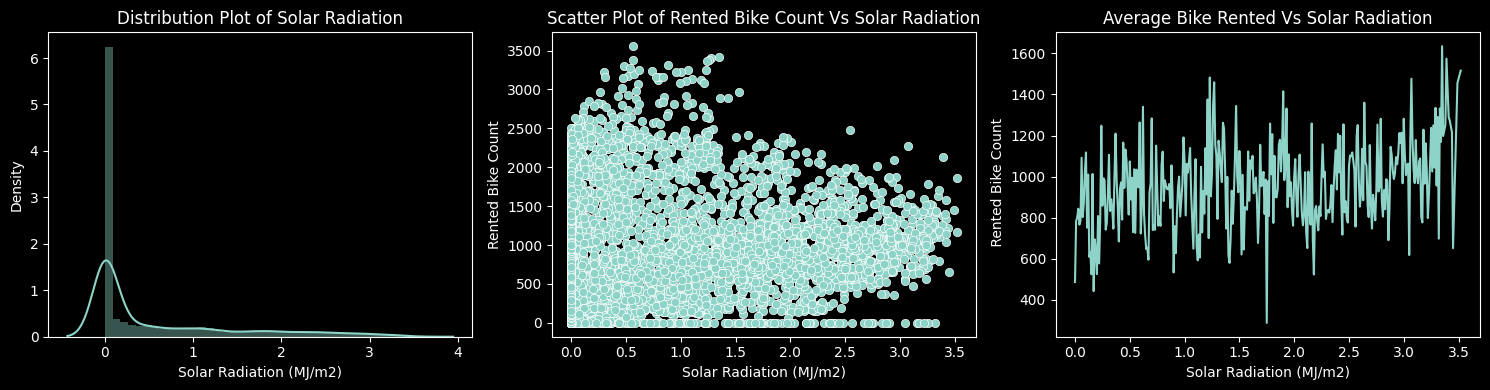

In [585]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_sharing_df['Solar Radiation (MJ/m2)'], ax=ax[0])
dist.set_title('Distribution Plot of Solar Radiation')

# Bi-variate analysis
# Rented Bike Count Vs Solar Radiation
scatter = sns.scatterplot(data=bike_sharing_df, x='Solar Radiation (MJ/m2)', y='Rented Bike Count', ax = ax[1])
scatter.set(xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Solar Radiation')

# Line Plot
group_solar_radiation = bike_sharing_df.groupby(['Solar Radiation (MJ/m2)'])['Rented Bike Count'].mean().reset_index()
line = sns.lineplot(data = group_solar_radiation, x ='Solar Radiation (MJ/m2)', y = 'Rented Bike Count', ax= ax[2])
line.set(xlabel='Solar Radiation (MJ/m2)', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Solar Radiation')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the distribution plot that solar radiation is highly skewed to positive.
* The average number of bikes rented goes up with solar radiation.
* Additionally, this column is directly related to the temperature column.

### **2.9 Column: 'Rainfall'**

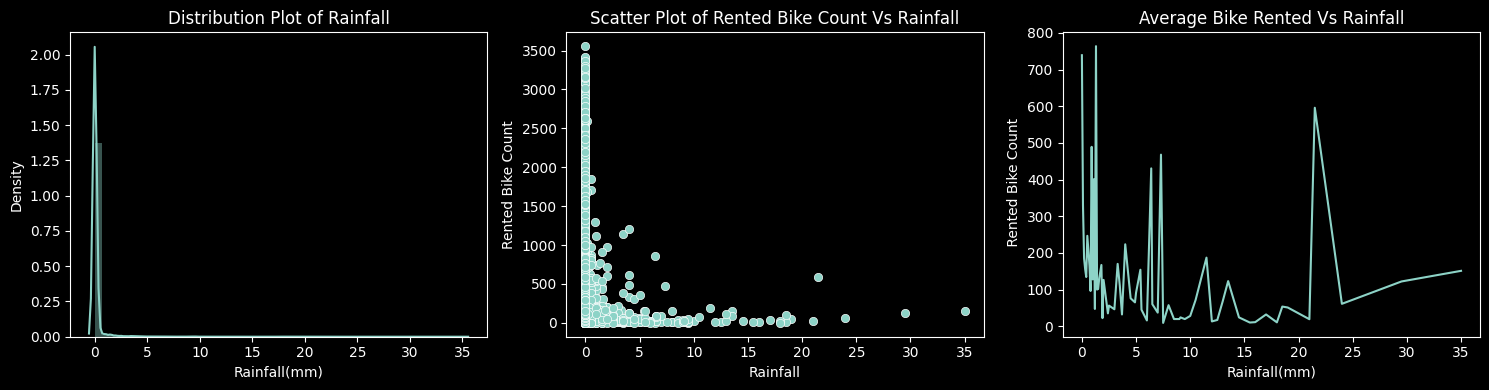

In [586]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_sharing_df['Rainfall(mm)'], ax=ax[0])
dist.set_title('Distribution Plot of Rainfall')

# Bi-variate analysis
# Rented Bike Count Vs Rainfall
scatter = sns.scatterplot(data=bike_sharing_df, x='Rainfall(mm)', y='Rented Bike Count', ax = ax[1])
scatter.set(xlabel='Rainfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Rainfall')

# Line Plot
group_rainfall = bike_sharing_df.groupby(['Rainfall(mm)'])['Rented Bike Count'].mean().reset_index()
line = sns.lineplot(data = group_rainfall, x ='Rainfall(mm)', y = 'Rented Bike Count', ax= ax[2])
line.set(xlabel='Rainfall(mm)', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Rainfall')

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of rainfall is highly skewed to the positive side.
* People prefer almost no or very less rainfall.

### **2.10 Column: 'Snowfall'**

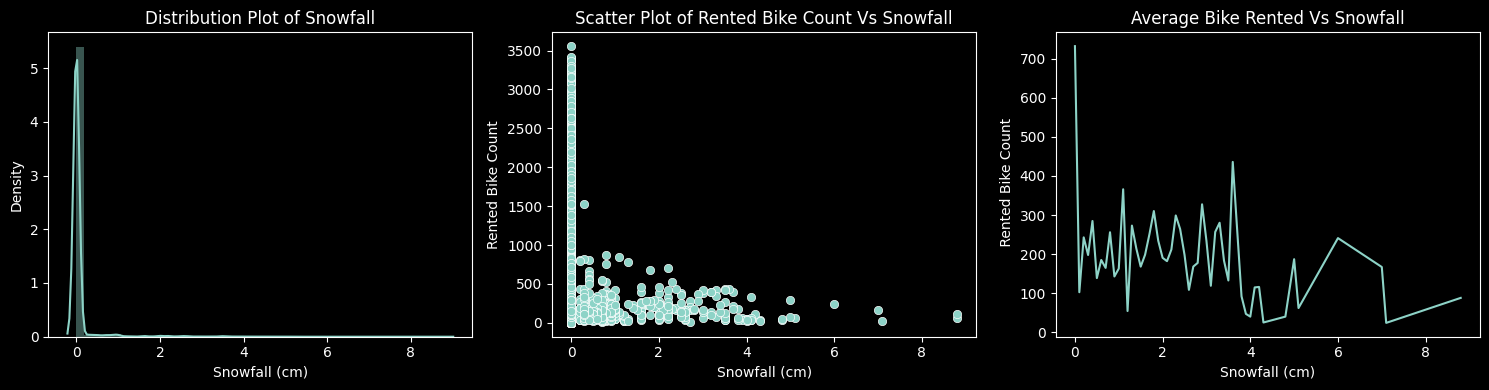

In [587]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_sharing_df['Snowfall (cm)'], ax=ax[0])
dist.set_title('Distribution Plot of Snowfall')

# Bi-variate analysis
# Rented Bike Count Vs Snowfall
scatter = sns.scatterplot(data=bike_sharing_df, x='Snowfall (cm)', y='Rented Bike Count', ax = ax[1])
scatter.set(xlabel='Snowfall (cm)', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Snowfall')

# Line Plot
group_snowfall = bike_sharing_df.groupby(['Snowfall (cm)'])['Rented Bike Count'].mean().reset_index()
line = sns.lineplot(data = group_snowfall, x ='Snowfall (cm)', y = 'Rented Bike Count', ax= ax[2])
line.set(xlabel='Snowfall (cm)', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Snowfall')

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of snowfall is highly skewed to the positive side.
* People prefer almost no or very less snowfall.

### **2.11 Column: 'Seasons'**

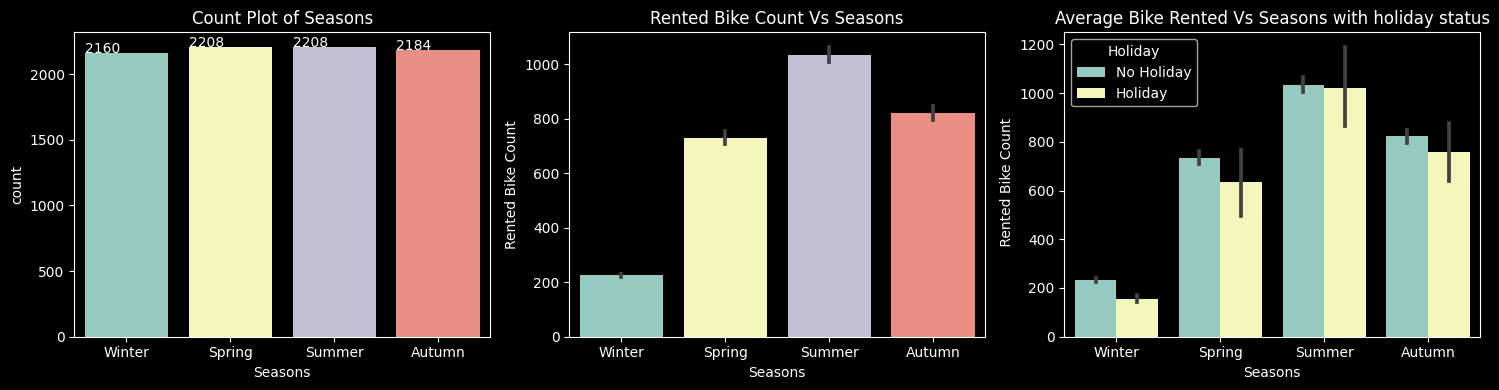

In [588]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_sharing_df, x='Seasons', ax=ax[0])
count.set_title('Count Plot of Seasons')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis
# Rented Bike Count Vs Seasons
bar = sns.barplot(data=bike_sharing_df, x='Seasons', y='Rented Bike Count', ax = ax[1])
bar.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Rented Bike Count Vs Seasons')

# Multi-variate analysis
cat = sns.barplot(data=bike_sharing_df, x='Seasons', y='Rented Bike Count', hue='Holiday', ax= ax[2])
cat.set(xlabel='Seasons', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Seasons with holiday status')

plt.tight_layout()
plt.show()

**Observation:**
* Dataset has 4 seasons and every season has more than 2000 counts.
* The most preferred season for the rented_bike_count is summer and the least preferred is winter which means that people prefer to rent bikes in warm temperatures.
* In every season on a no holiday rented_bike_count has more count than on a holiday.

### **2.12 Column: 'holiday'**

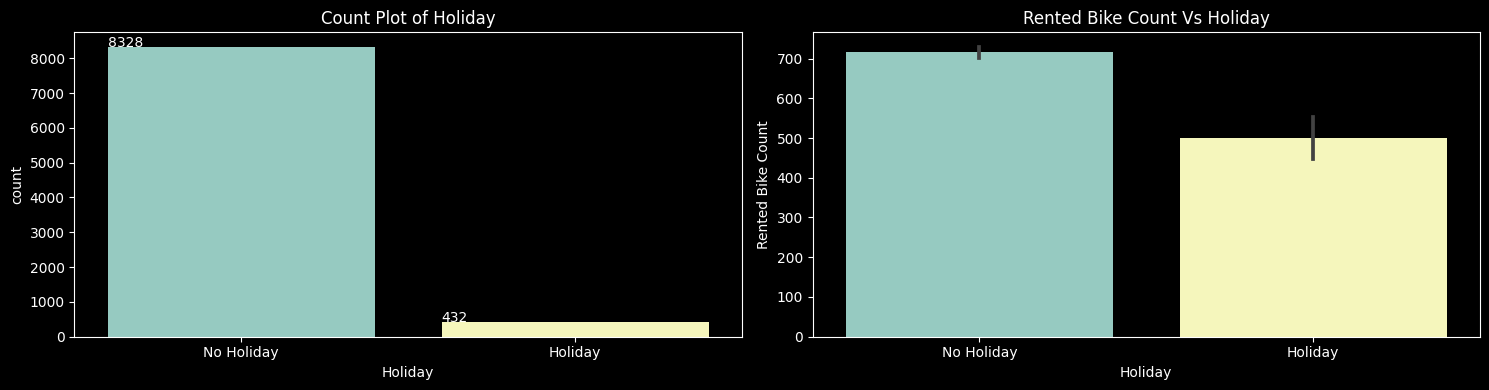

In [589]:
fig,ax = plt.subplots(1,2, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_sharing_df, x='Holiday', ax=ax[0])
count.set_title('Count Plot of Holiday')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis
# Rented Bike Count Vs Holiday
bar = sns.barplot(data=bike_sharing_df, x='Holiday', y='Rented Bike Count', ax = ax[1])
bar.set(xlabel='Holiday', ylabel='Rented Bike Count', title='Rented Bike Count Vs Holiday')


plt.tight_layout()
plt.show()

**Observation:**
* Dataset has more records of No holiday than a holiday which is obvious as most of the days are working days.
* When there are no holidays, demand for bike sharing is higher than when there are holidays, indicating that business-related bike rentals are preferred.


## <b>3. Clean Up:</b>

### <b>Handling null values:</b>

Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

Missing values can bias the results of the machine learning models and/or reduce the accuracy of the model.

Therefore it is an essential practice to handle null values before training our model. There are two main ways of handling null values, one is to delete the observations containing null values and the other is to impute the null values with some meaning full values.

In [590]:
#Checking for null values
bike_sharing_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<b>As we can see there are no null values present in our dataset and therefore we are good to go.</b>

###<b>Handling duplicate values:</b>

When two features have the same set of values they are known as duplicate values.

Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production.

The best way of dealing with duplicate values is to delete them.

In [591]:
#Checking for duplicate values
bike_sharing_df.duplicated().sum()

0

<b>As we can see there are no duplicate values, so we can move ahead.</b>

###<b>Removing outliers:</b>

Outliers are those data points that are significantly different from the rest of the data points in the dataset. These can cause the data to skew and affect the accuracy of the ML model.

In [592]:
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(bike_sharing_df.describe().columns)-{'Rented Bike Count','Hour'})
possible_outlier_cols

['Solar Radiation (MJ/m2)',
 'Visibility (10m)',
 'Temperature(°C)',
 'Wind speed (m/s)',
 'Rainfall(mm)',
 'Humidity(%)',
 'Snowfall (cm)',
 'Dew point temperature(°C)']

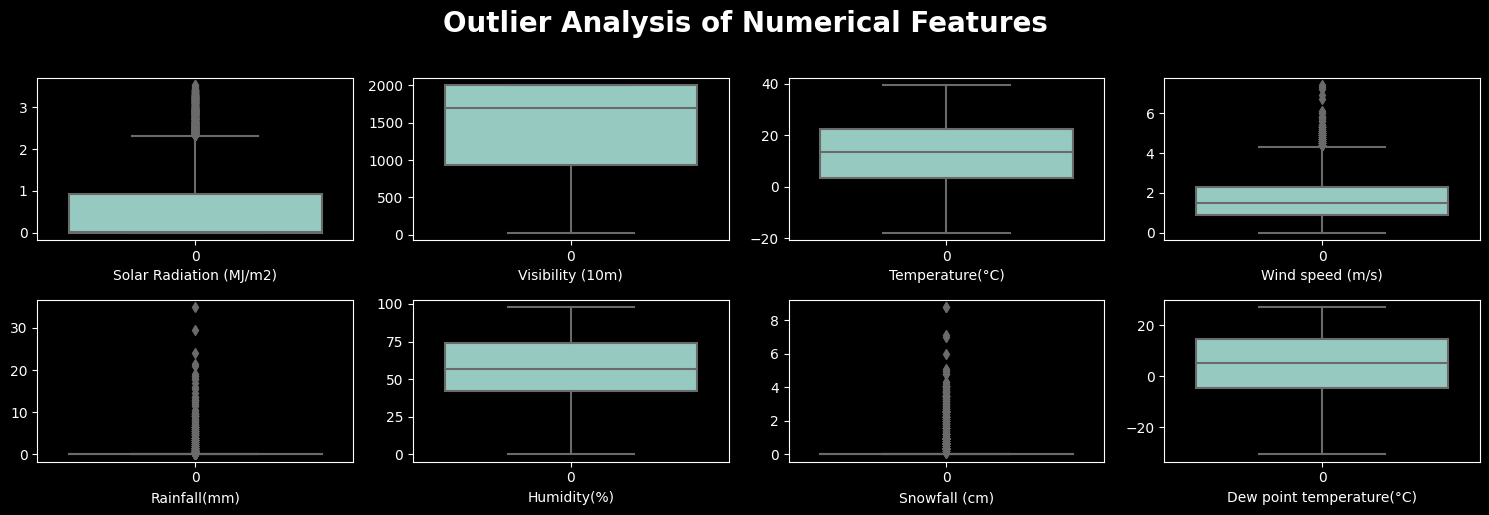

In [593]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(possible_outlier_cols):
  plt.subplot(2, 4, i+1)            # subplot of 2 rows and 3 columns

  # countplot
  sns.boxplot(bike_sharing_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()


Observation:
* Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation

In [594]:
#Creating a list of columns that contains outliers
outlier_cols = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
outlier_cols

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

In [595]:
#Finding the inter-quartile range for the columns with outliers
Q1 = bike_sharing_df[outlier_cols].quantile(0.25)
Q3 = bike_sharing_df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [596]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [597]:
#Detecting and removing the outliers
bike_sharing_df[outlier_cols] = bike_sharing_df[outlier_cols][~((bike_sharing_df[outlier_cols] < l_fence) | (bike_sharing_df[outlier_cols] > u_fence))]

In [598]:
#Checking the number of outliers deleted
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8599 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8119 non-null   float64
 9   Rainfall(mm)               8232 non-null   float64
 10  Snowfall (cm)              8317 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Observation:
* Due to outlier deletion, some null values have been created in these 4 columns.Now, we can either delete the observations with null values or impute them with some meaning full values. In this case I will be imputing them with the median value of each column.

Note: Usually mean is chosen to impute null values, but I'll be choosing the median because mean is affected very much by outliers whereas the median is not.</b>

In [599]:
#Creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    bike_sharing_df[col].fillna(bike_sharing_df[col].median(),inplace=True)

In [600]:
#Calling the imputing function
impute_null(outlier_cols)

In [601]:
#Checking if the imputation is successful
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Observation:
* The imputation is successful and therefore we have handled the outliers successfully.

## <b>4.Feature Engineering:</b>

### <b>Feature encoding:</b>
Machine learning models can only work with numerical values and therefore important categorical columns have to converted/encoded into numerical variables. This process is known as <b>Feature Encoding</b>

Here we have three columns that require encoding and they are Seasons, Holiday and Functioning Day.

In [602]:
#Encoding for Seasons column
bike_sharing_df['Winter'] = np.where(bike_sharing_df['Seasons']=='Winter', 1, 0)
bike_sharing_df['Spring'] = np.where(bike_sharing_df['Seasons']=='Spring', 1, 0)
bike_sharing_df['Summer'] = np.where(bike_sharing_df['Seasons']=='Summer', 1, 0)
bike_sharing_df['Autumn'] = np.where(bike_sharing_df['Seasons']=='Autumn', 1, 0)

#Removing seasons column since we dont require it now.
bike_sharing_df.drop(columns=['Seasons'],axis=1,inplace=True)

In [603]:
#Encoding for Holiday column
bike_sharing_df['Holiday'] = np.where(bike_sharing_df['Holiday']=='Holiday',1,0)

In [604]:
#Encoding for Functioning day
bike_sharing_df['Functioning Day'] = np.where(bike_sharing_df['Functioning Day']=='Yes',1,0)

In [605]:
#Look of the dataframe after encoding all three columns
bike_sharing_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0           0.0            0.0        0   
1                      0.0           0.0            0.0        0   
2                      0.0           0.0            0.0        0   
3                      0.0           0.0            0.0        0   
4                      0.0           0.0            0.0        0   

   Functioning Day  Winter  Spring  Summer  Autumn  
0                1       1       0       0       0  
1                1       1       0       0       0  
2                1       1       0       0       0  
3                1       1       0       0       0  
4                1       1       0       0       0

###<b>Checking correlation for feature removal:</b>

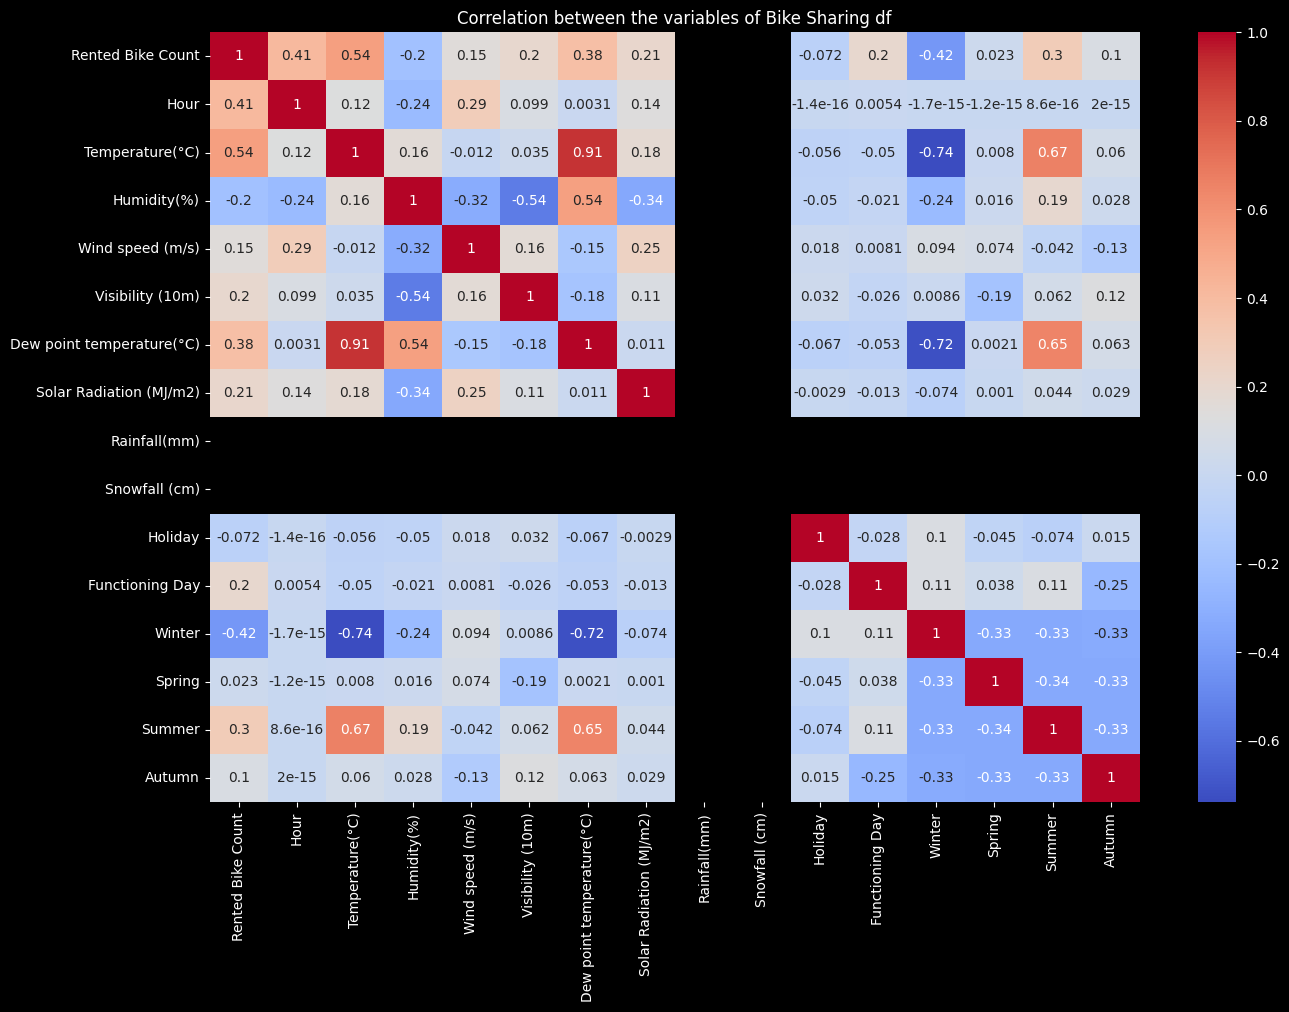

In [606]:
#Plotting correlation matrix using sns.heatmap
corr_matrix = bike_sharing_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables of Bike Sharing df')
plt.show()

Observation:
* The Dew point temperature column is highly correlated to the Temperature column and therefore we can remove it and it most likely won't affect our model building much, so we will drop the dew point temperature column.

* I will also remove the date column because I don't think it adds any value.

In [607]:
#Dropping unnecessary columns
bike_sharing_df.drop(columns={'Dew point temperature(°C)','Date'},axis=1,inplace=True)

In [608]:
bike_sharing_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Winter',
       'Spring', 'Summer', 'Autumn'],
      dtype='object')

### <b>Removing Multicollinearity:</b>
Multicollinearity is when two independent variables are highly correlated to each other.

Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity.

<b>Note:</b> I will check the multicollinearity of our dataset by using the variance inflation factor. Accepted VIF is less than 10.

In [609]:
#Creating a list of independent columns
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})

In [610]:
#Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [611]:
#Calculating the VIF for independent columns
calc_vif(bike_sharing_df[idv_cols])

Columns        VIF
0   Solar Radiation (MJ/m2)   1.270845
1          Visibility (10m)   1.629212
2                    Winter  20.853971
3                    Autumn  23.650728
4           Temperature(°C)   4.443786
5           Functioning Day   1.079354
6                    Summer  31.340811
7                    Spring  23.455815
8              Rainfall(mm)        NaN
9               Humidity(%)   2.042755
10            Snowfall (cm)        NaN
11                     Hour   1.180808
12                  Holiday   1.022255
13         Wind speed (m/s)   1.234386

Observation:
* We can see that the seasons encoding have very high VIF therefore we will eliminate one of the columns. We will drop winter because it has the lowest bikes rented. The columns Rainfall and Snowfall have no VIF at all so we will drop them too.

In [612]:
#Dropping the Unnecessary columns
bike_sharing_df.drop(columns={'Winter','Rainfall(mm)','Snowfall (cm)'},axis=1,inplace=True)

In [613]:
#Creating a list of remaining independent columns
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})

In [614]:
#Calculating VIF for remaining independent columns
calc_vif(bike_sharing_df[idv_cols])

Columns        VIF
0   Solar Radiation (MJ/m2)   1.652737
1          Visibility (10m)   7.345935
2                    Autumn   4.448885
3           Temperature(°C)   9.607644
4           Functioning Day  18.833311
5                    Summer   9.199786
6                    Spring   3.976104
7               Humidity(%)  10.462240
8                      Hour   4.226978
9                   Holiday   1.071381
10         Wind speed (m/s)   4.834994

Observation:
* We can see that Functioning Day has a VIF>10 therefore we will remove it.

In [615]:
#Dropping the Functioning Day column
bike_sharing_df.drop(columns={'Functioning Day'},axis=1,inplace=True)

In [616]:
#Creating a list with remaining independent columns
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})

In [617]:
#Calculating the VIF for remaining independent columns
calc_vif(bike_sharing_df[idv_cols])

Columns       VIF
0  Solar Radiation (MJ/m2)  1.598384
1         Visibility (10m)  5.216380
2                   Autumn  4.437701
3          Temperature(°C)  9.481974
4                   Summer  9.167621
5                   Spring  3.927898
6              Humidity(%)  5.401113
7                     Hour  4.025525
8                  Holiday  1.070809
9         Wind speed (m/s)  4.707847

Observation:
* Now that we don't have any variable with VIF>10 we can move ahead.

### <b>Obtaining correlation between independent and dependent variables:</b>
We will use a regression plot to find this correlation. This also finds if the independent variable has a linear relationship with the dependent variable, which is an assumption that has to be satisfied for models like linear regression.

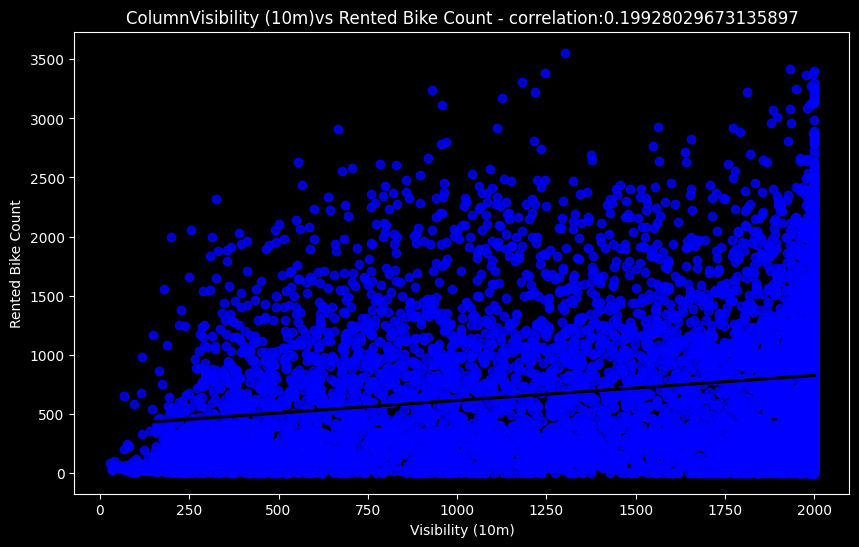

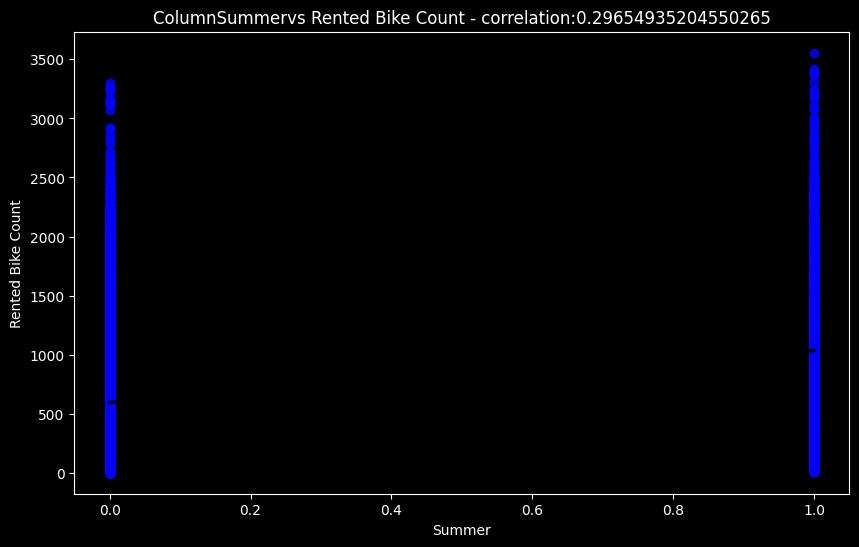

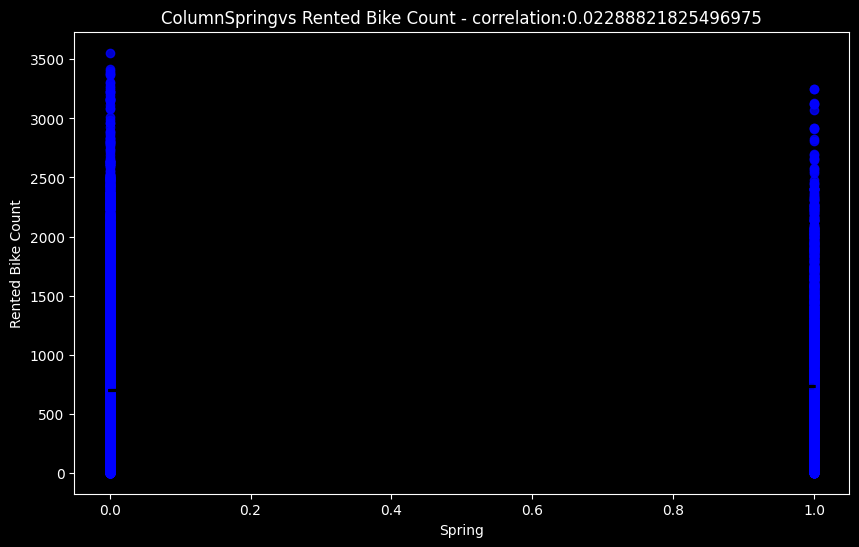

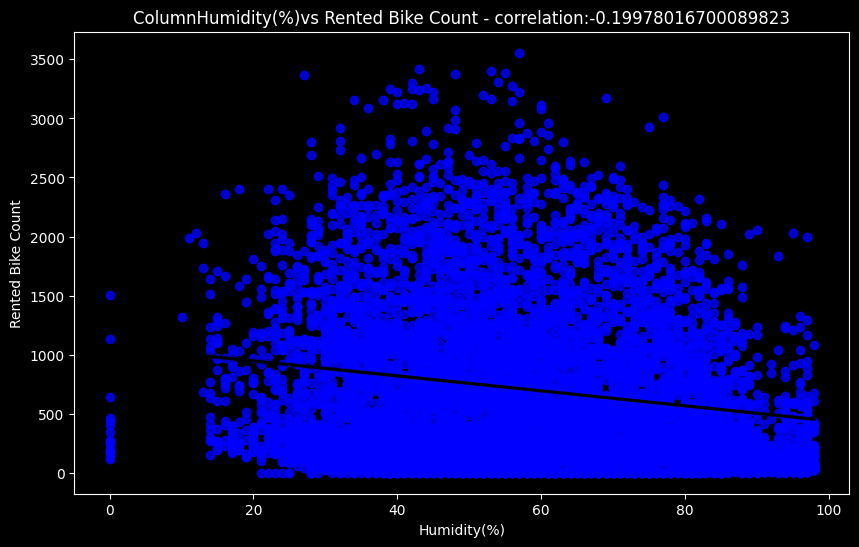

In [618]:
#printing the regression plot for all the numerical features
for col in idv_cols:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_sharing_df[col],y=bike_sharing_df['Rented Bike Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"})
  corr=bike_sharing_df[col].corr(bike_sharing_df['Rented Bike Count'])
  ax.set_title('Column'+ col+'vs Rented Bike Count - correlation:'+str(corr))

Observation:
* We can see that all the remaining columns that we have, have a linear relationship with the dependent variable. So we have satisfied the assumption and therefore we are good to go.

## <b>5. Pre processing of the data:</b>

In [619]:
#Creating the dataset for independent and dependent variables
X = bike_sharing_df.drop(columns={'Rented Bike Count'},axis=1)
Y = bike_sharing_df['Rented Bike Count']

In [620]:
#First look of the independent variable dataset
X.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   
3     3             -6.2           40               0.9              2000   
4     4             -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Holiday  Spring  Summer  Autumn  
0                      0.0        0       0       0       0  
1                      0.0        0       0       0       0  
2                      0.0        0       0       0       0  
3                      0.0        0       0       0       0  
4                      0.0        0       0       0       0

In [621]:
#First look of the dependent variable dataset
Y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

### <b>Target feature conditioning:</b>
The distribution of the target feature is observed and in this case because it is a positively skewed distribution it is normalised using square root transformation.

In [622]:
#Checking for the distribution of the Target variable
plt.figure(figsize=(10,7))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str(skew(bike_sharing_df['Rented Bike Count'])))
sns.histplot(data=bike_sharing_df,x='Rented Bike Count')
plt.show()

In [623]:
#Applying square root transformation on the dependent variable
Y = np.sqrt(Y)

In [624]:
#Creating a dataframe with values of Y for visualisation purposes
vis_Y = Y.reset_index()

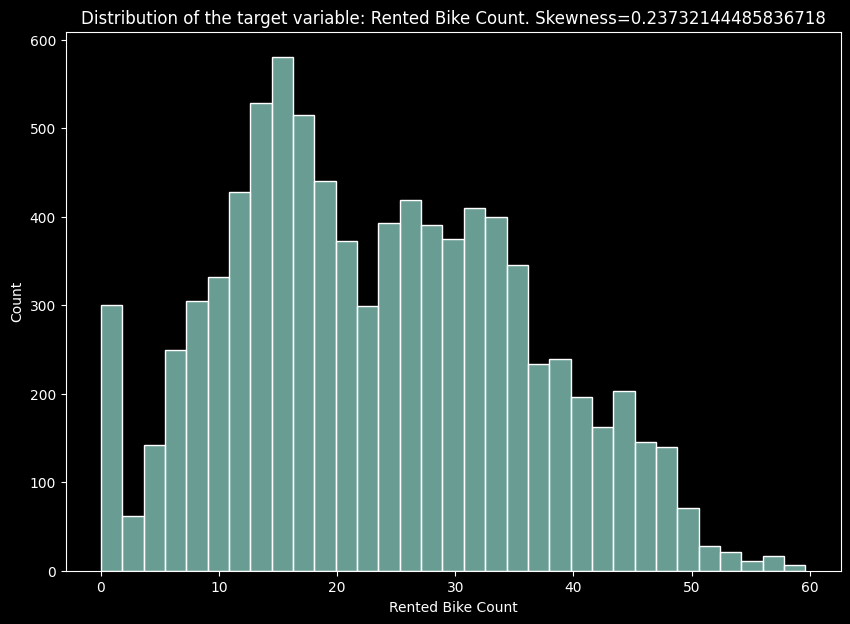

In [625]:
#Checking how well the square root transformation has worked
plt.figure(figsize=(10,7))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str(skew(vis_Y['Rented Bike Count'])))
sns.histplot(data=vis_Y,x='Rented Bike Count')
plt.show()

Observation:
* We can see that the target variable has been normalised and we are good to go.

### <b>Creating the test and train dataset:</b>

In [626]:
# Data spliting and value assigning to variables for Reggression

X = bike_sharing_df.drop(columns = ['Rented Bike Count'] , axis = 1)
y = np.sqrt(bike_sharing_df['Rented Bike Count'])

In [627]:
#Shape of the train set of the independent value
X.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   
3     3             -6.2           40               0.9              2000   
4     4             -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Holiday  Spring  Summer  Autumn  
0                      0.0        0       0       0       0  
1                      0.0        0       0       0       0  
2                      0.0        0       0       0       0  
3                      0.0        0       0       0       0  
4                      0.0        0       0       0       0

In [628]:
#Shape of the test set of the independent values
Y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

## <b>6. Model Implementation:</b>
Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we are dealing with a regression problem, therefore we will be using regression models. Some popular examples are Linear Regression and polynomial regression.

In this project we will be include the following models:
1. Linear regression.
2. Ridge regression (Linear regression with L2 regularization).
3. Lasso regression (Linear regression with L1 regularization).
4. Random forest regression.

In [629]:
# Train test spliting

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape

(6570, 10)


(2190, 10)

### <b>Linear regression:</b>
As stated earlier linear regression is a regression technique, and it comes under supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable value (x). So, this regression technique finds out a linear relationship between x (input) and y(output)

In [630]:
# initalizing the model
regg = LinearRegression().fit(X_train,y_train)

In [631]:
# Checking score
regg.score(X_train,y_train)

0.4827923516054775

In [632]:
#Checking Coefficent
regg.coef_

array([ 5.05388959e-01,  3.70372030e-01, -1.59963931e-01, -6.50293324e-03,
        3.36246357e-04,  2.64425375e-01, -3.59684344e+00,  5.63946400e+00,
        7.29670762e+00,  6.28106892e+00])

In [633]:
#Predicting the value of the dependent variable for train and test dataset

y_pred_train = regg.predict(X_train)
y_pred_test = regg.predict(X_test)

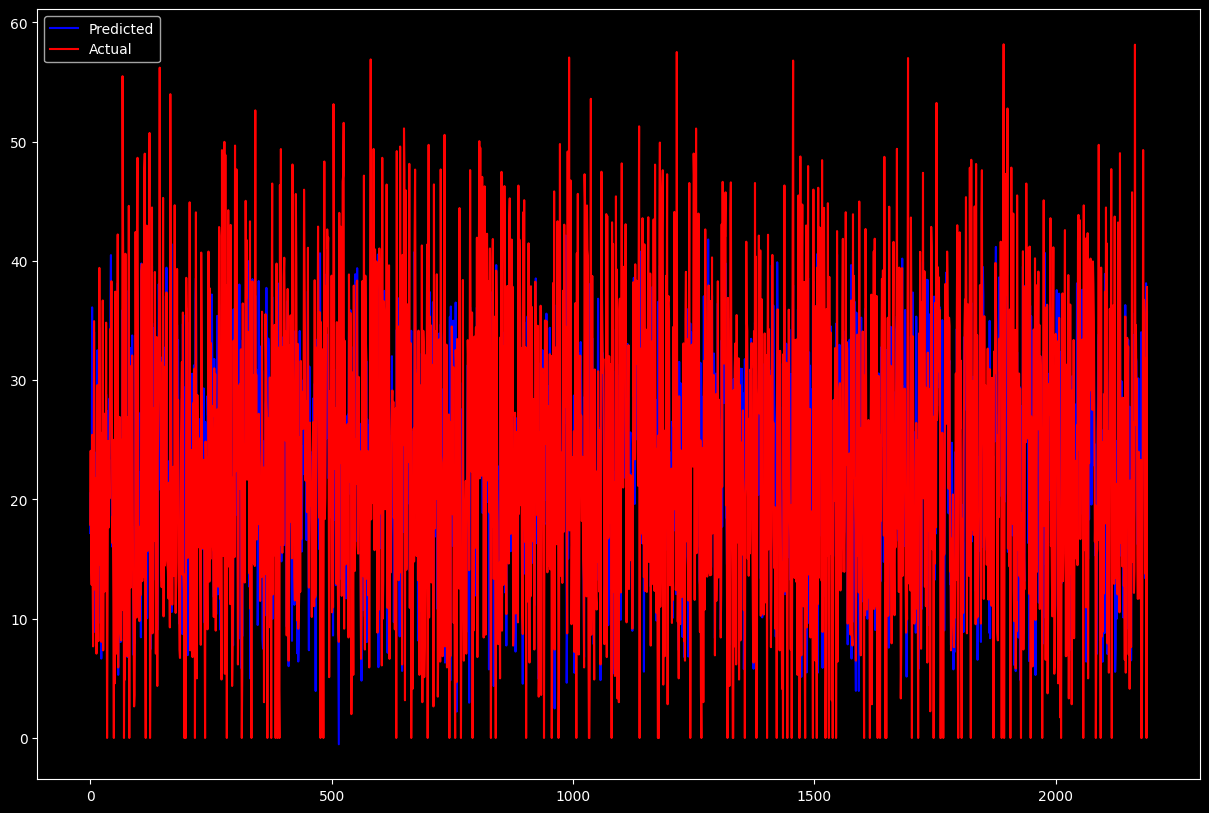

In [634]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test, color='blue')
plt.plot(np.array(y_test), color='red')
plt.legend(["Predicted","Actual"])
plt.show()

In [635]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 79.64515685620867
RMSE : 8.924413530098697
MAE : 6.551457754957198
R2 : 0.4827923516054775
Adjusted R2 : 0.48041875064910067


In [636]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 86.46406222826216
RMSE : 9.298605391576855
MAE : 6.811293680781672
R2 : 0.45264271137831147
Adjusted R2 : 0.450130745849988


### <b>Ridge Regression:</b>
Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [637]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [638]:
#checking score

ridge.score(X_train,y_train)

0.48279234050229425

In [639]:
# Predicted Train & Test values

y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

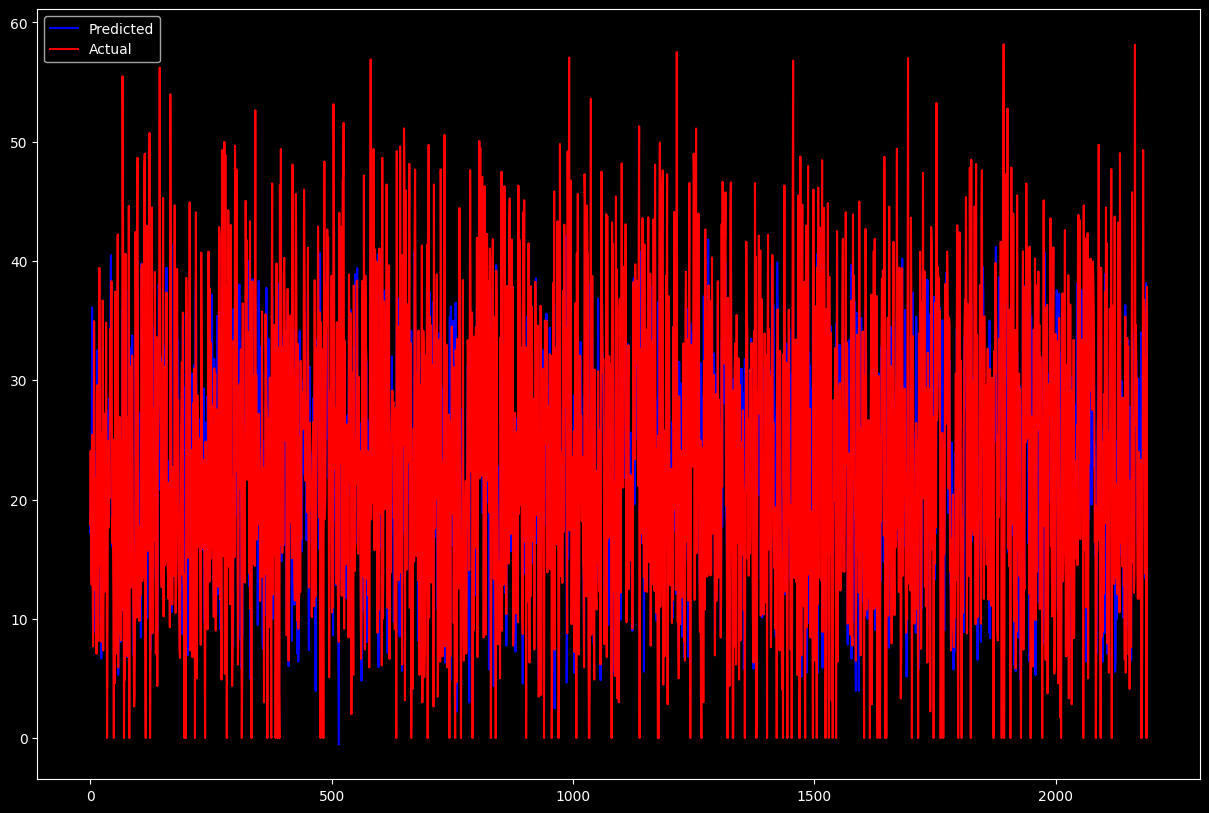

In [640]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_ridge, color='blue')
plt.plot(np.array(y_test), color='red')
plt.legend(["Predicted","Actual"])
plt.show()

In [641]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 79.64515856599539
RMSE : 8.924413625891361
MAE : 6.551415051346212
R2 : 0.48279234050229425
Adjusted R2 : 0.48041873949496194


In [642]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 86.4638705921409
RMSE : 9.298595087008623
MAE : 6.811233366248704
R2 : 0.4526439245231144
Adjusted R2 : 0.45013196456222926


As we can see there is only a very slight difference between the results achieved through Linear regression and Ridge regression.

### <b>Lasso Regression:</b>
Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [643]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

0.4377771866785919
0.4603803766940392


In [644]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

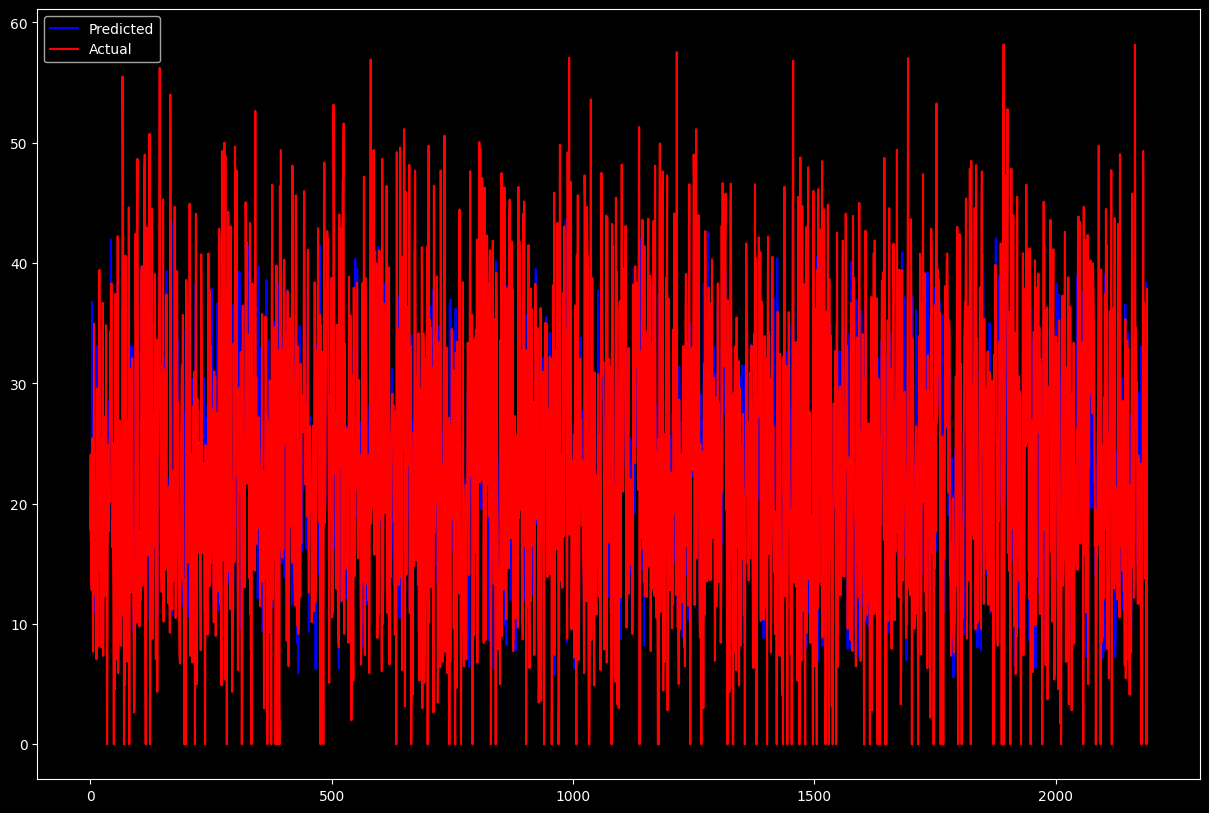

In [645]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_lasso, color='blue')
plt.plot(np.array(y_test), color='red')
plt.legend(["Predicted","Actual"])
plt.show()

In [646]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 83.09639208604294
RMSE : 9.115722247087334
MAE : 6.799727276567394
R2 : 0.4603803766940392
Adjusted R2 : 0.4579039213323781


In [647]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 88.81231569891376
RMSE : 9.424028634236727
MAE : 7.0032765290603205
R2 : 0.4377771866785919
Adjusted R2 : 0.4351969993756024


<b>The model quality has depreciated by using the lasso regression method.</b>

### <b>Random Forest Regression:</b>
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [648]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [649]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [650]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [651]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 6.134010768030669
RMSE : 2.4766935151590053
MAE : 1.4858818119187964
R2 : 0.9601663502240625
Adjusted R2 : 0.9599835432035213


In [652]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 50.98780148107976
RMSE : 7.140574310311444
MAE : 4.205373201101833
R2 : 0.6772237615000424
Adjusted R2 : 0.6757424570553432


In [653]:
# Feature importances
rf_model.feature_importances_

array([0.26558787, 0.36288255, 0.17373105, 0.04793818, 0.04808537,
       0.04591777, 0.01086163, 0.00792873, 0.00351083, 0.03355602])

In [654]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [655]:
plt.style.use('dark_background')

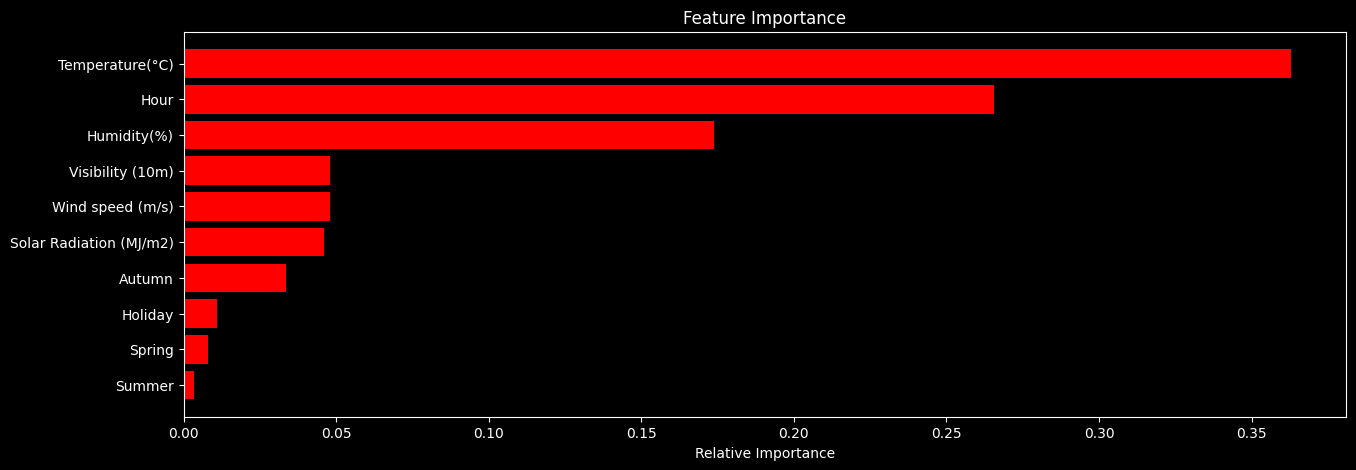

In [656]:
#Plotting figure
plt.figure(figsize=(15,5))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

<b>As we can see the quality of model prediction has drastically improved.</b>

## <b>7. Model Explainability:</b>
Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:
1. LIME
2. SHAP
3. ELI-5

In this project I'll be using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.

In [657]:
#Installing the shap library
!pip install shap

In [658]:
#Initialising javascript for visualisation of SHAP
import shap

In [659]:
#Creating a function to plot the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

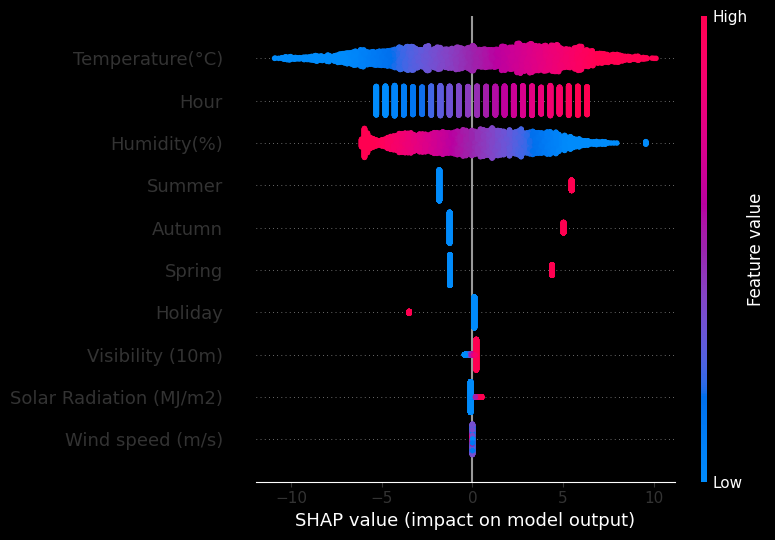

In [660]:
#Plotting shap summary plot for linear regression
shap_summary(regg)

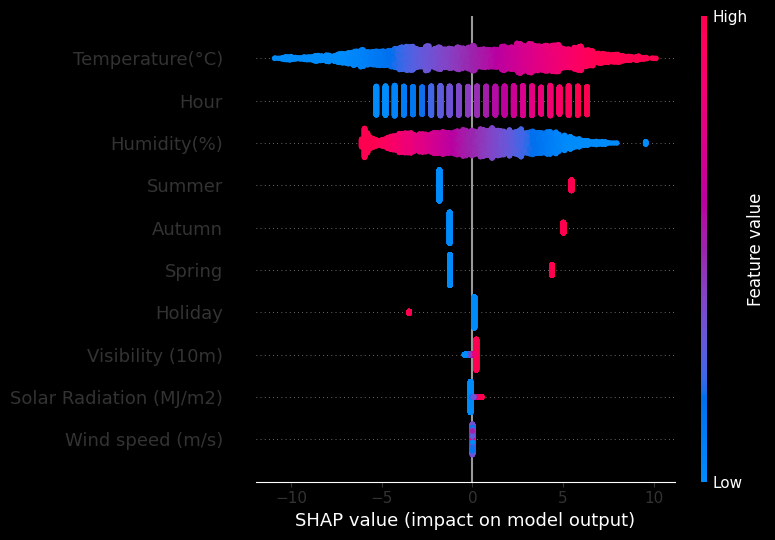

In [661]:
#Plotting shap summary plot for Ridge regression
shap_summary(ridge)

In [662]:
#Plotting shap summary plot for Lasso regression
shap_summary(lasso)

100%|===================| 6556/6570 [06:58<00:00]       

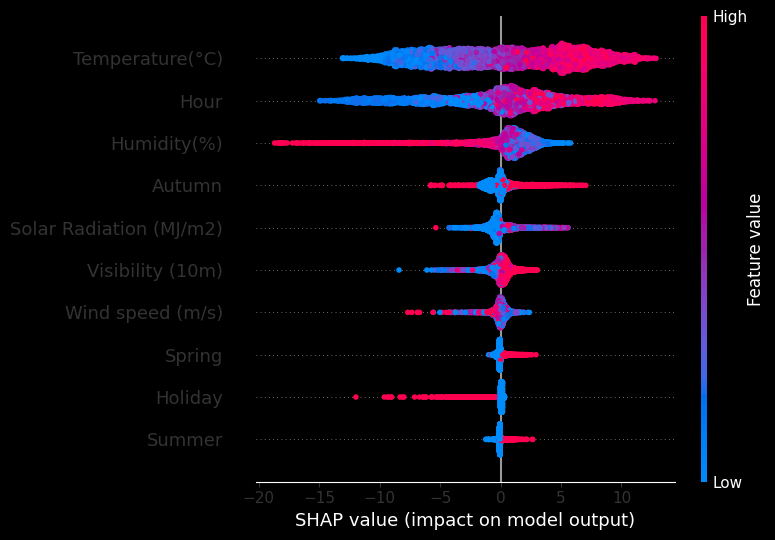

In [663]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

We see that different importance or impact power is given to the features by each model and that defines how well the model performs on prediction. Random forest gives almost all the features a significant impact power and therefore it performs the best out of all the 4 models.

By looking at the SHAP summary plot for each model, we can figure out the feature importance and also its impact power by understanding the SHAP values.

##<b>Conclusion:</b>
1. EDA insights:
  * Most number of bikes are rented in the Summer season and the lowest in the winter season.
  * Over 96% of the bikes are rented on days that are considered as No Holiday.
  * Most number of bikes are rented when there is no snowfall or rainfall.
  * Majority of the bikes are rented for a humidity percentage range of 30 to 70.
  * The highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.
  * Most of the bike rentals have been made when there is high visibility.

2. Results from ML models:
  * Random Forest Regression is the best performing model with an testing r2 score of 0.6799 and training r2 score of 0.96.
  * Lasso Regression(L1 regularization) is the worst performing model with an r2 score of 0.4377.
  * Actual vs Prediction visualisation is done for all the 4 models.
  * All 4 models have been explained with the help of SHAP library.
  * Temperature and Hour are the two most important factors according to all the models.

3. Challenges faced:
  * Removing Outliers.
  * Encoding the categorical columns.
  * Removing Multicollinearity from the dataset.
  * Choosing Model explainability technique.